In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import Markdown

In [2]:
df = pd.read_csv(
    'https://github.com/pcm-dpc/COVID-19/blob/master/dati-province/dpc-covid19-ita-province.csv?raw=true',
    parse_dates=['data'],
    na_values=[
        'In fase di definizione/aggiornamento',
        'Fuori Regione / Provincia Autonoma'
    ]
)
df['date'] = df.data.dt.normalize()

In [3]:
lm = df[df.denominazione_regione=='Lombardia']

In [4]:
lm0 = lm[['date', 'denominazione_provincia', 'totale_casi']].dropna()

In [5]:
for prov in lm0.denominazione_provincia.unique():
    _lm = lm0[lm0.denominazione_provincia==prov].set_index('date').totale_casi.diff()
    lm0.loc[lm0.denominazione_provincia==prov, 'new_cases'] = _lm.values

In [6]:
lm0.columns = ['date', 'province', 'total_cases', 'new_cases']

In [7]:
pop = pd.read_csv('pop.csv')

In [8]:
for prov in lm0.province.unique():
    _nc = lm0[lm0.province==prov].new_cases.values
    _pop = pop[pop.Territorio==prov].Value.values[0]
    _ic = _nc / _pop * 1e5
    lm0.loc[lm0.province==prov, 'incidence'] = _ic

In [9]:
lm0.dropna(inplace=True)

# Bergamo

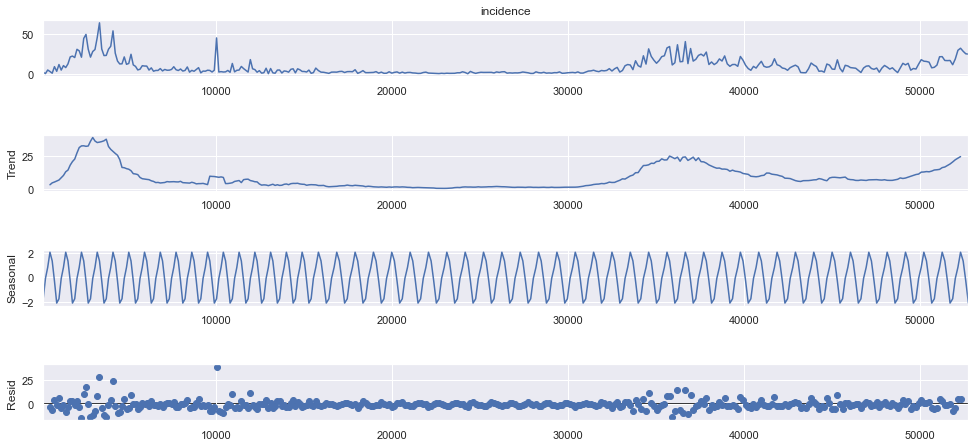

# Brescia

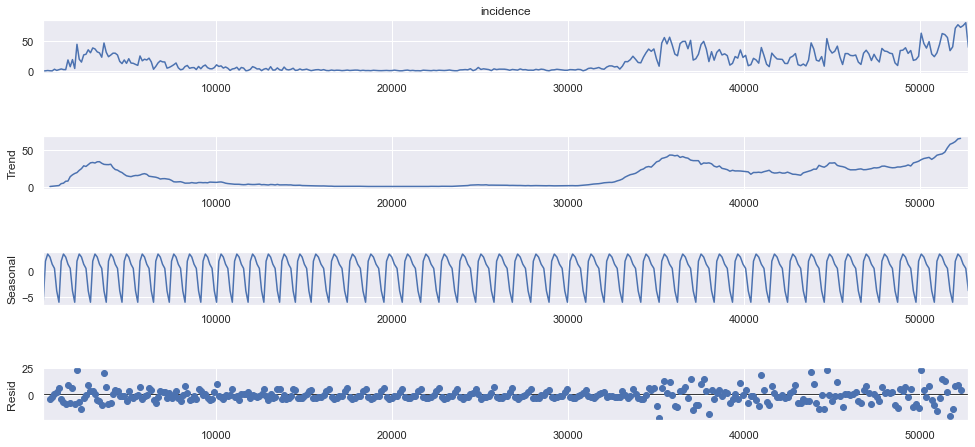

# Como

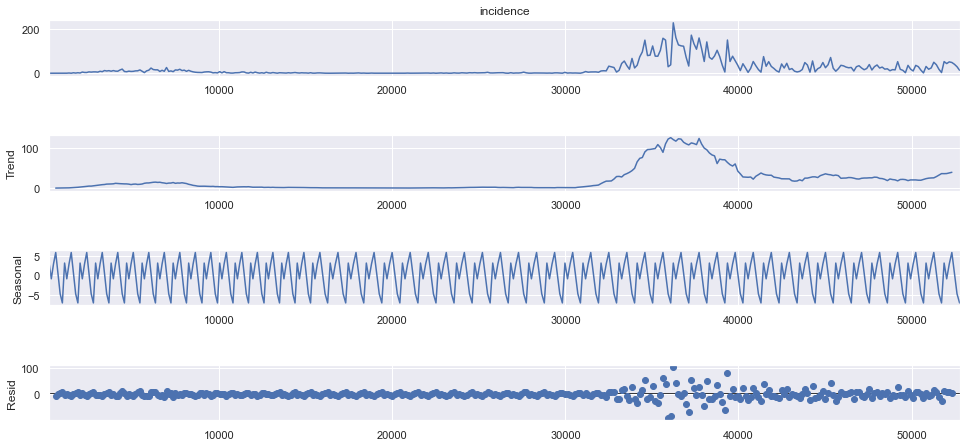

# Cremona

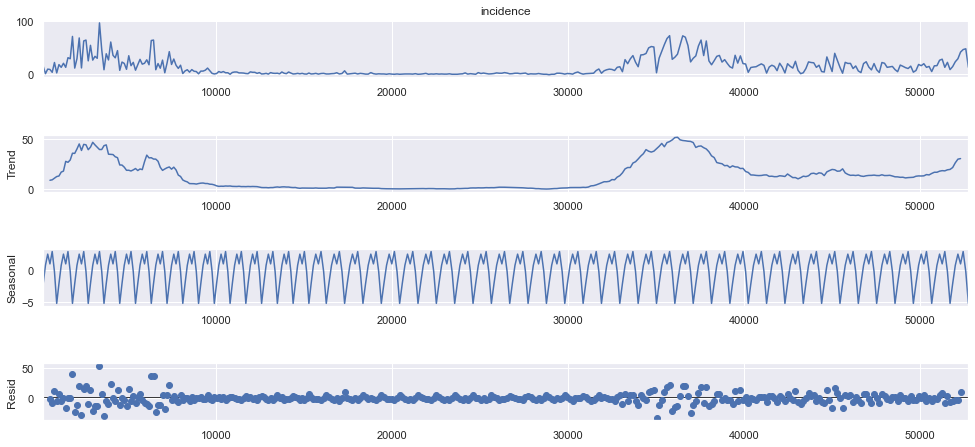

# Lecco

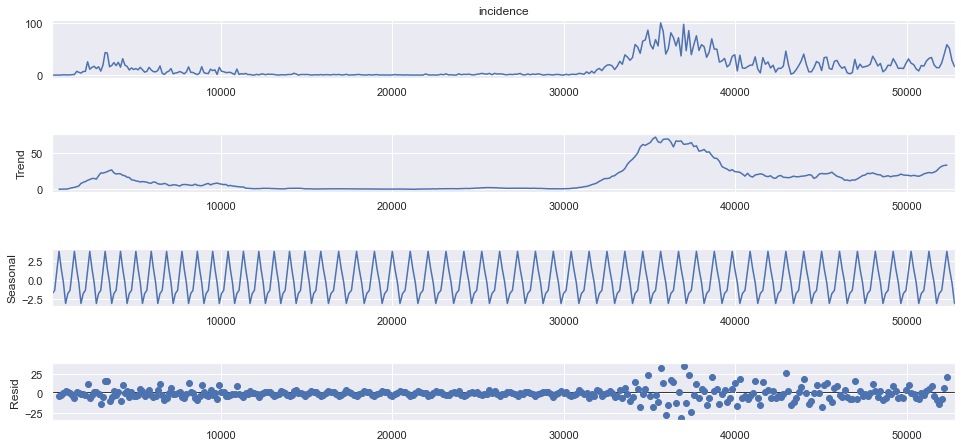

# Lodi

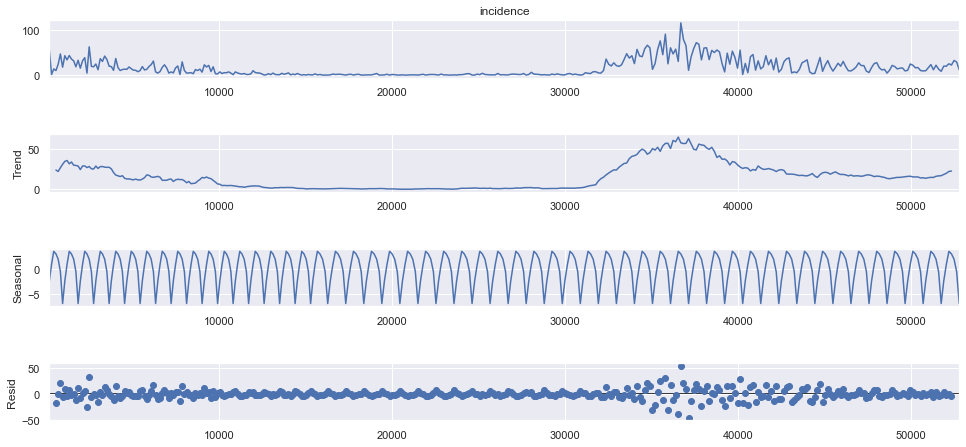

# Mantova

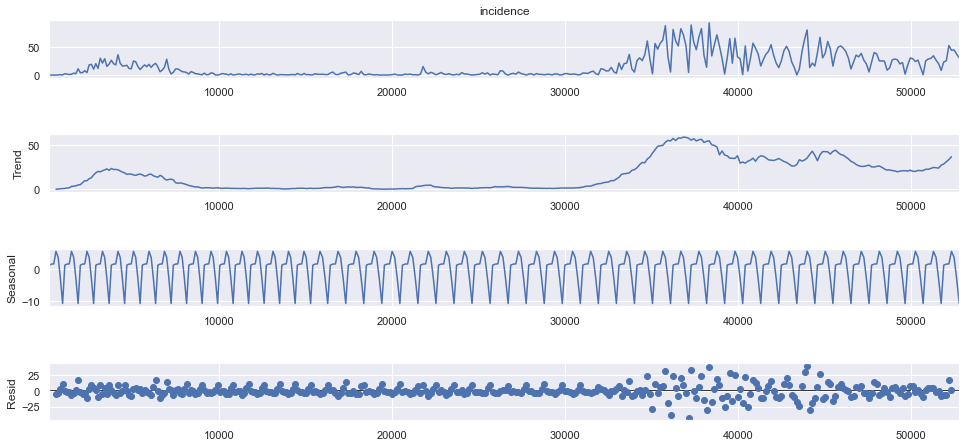

# Milano

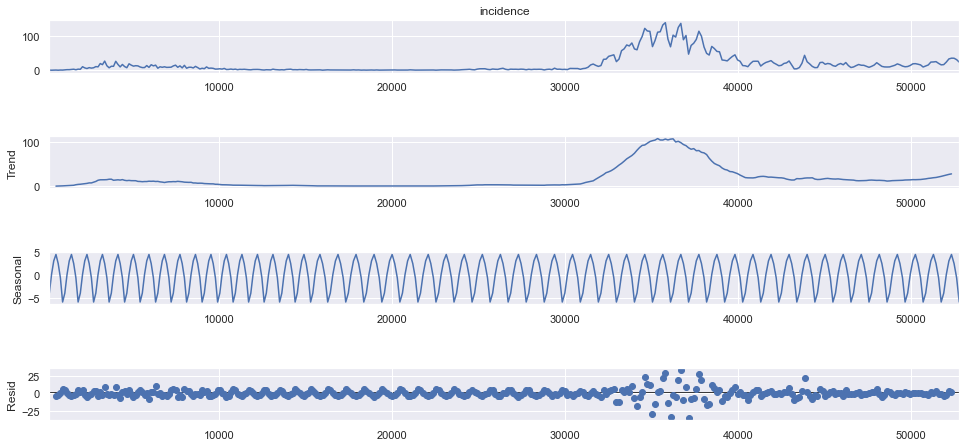

# Monza e della Brianza

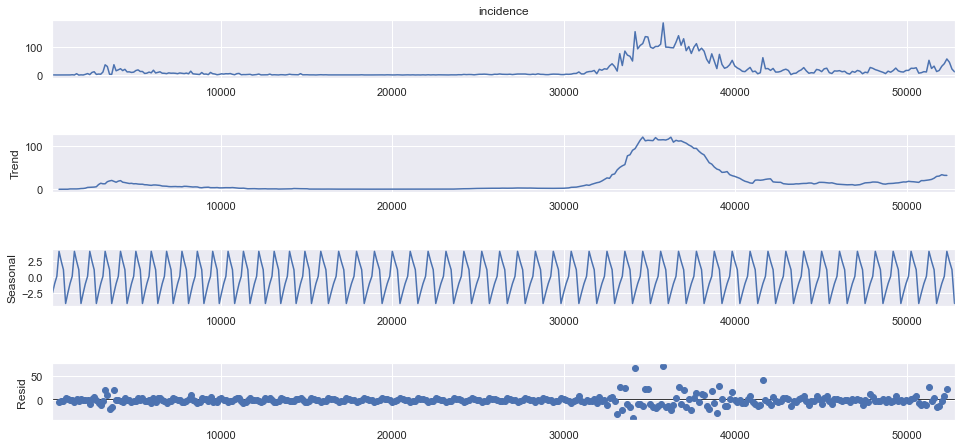

# Pavia

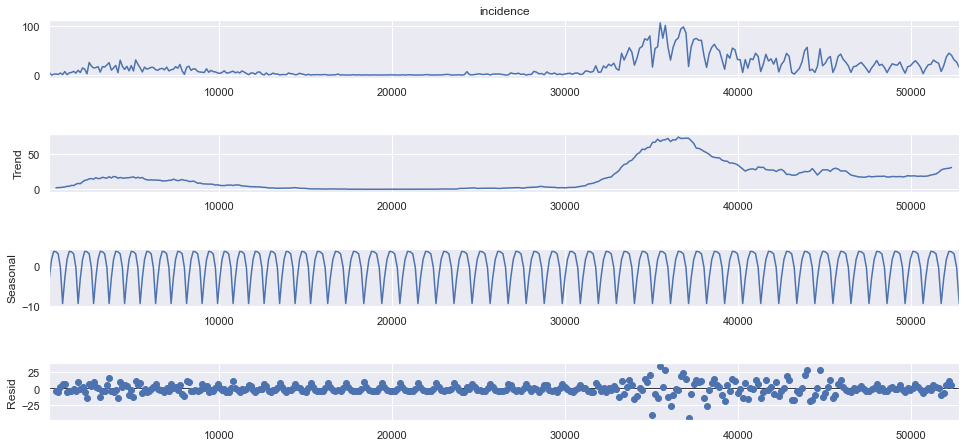

# Sondrio

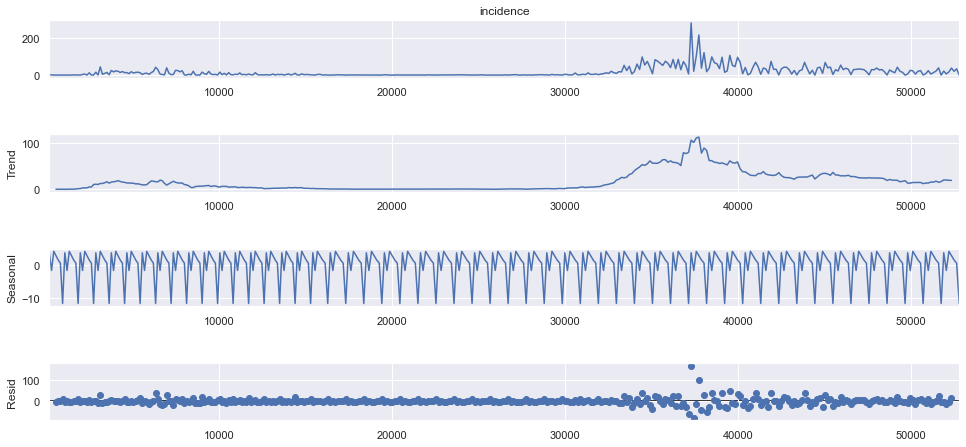

# Varese

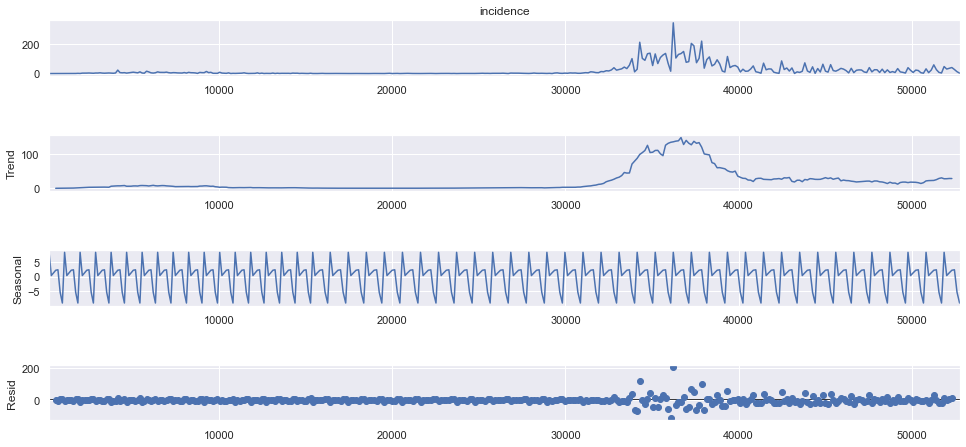

In [11]:
for prov in sorted(lm0.province.unique()):
    display(Markdown(f"# {prov}"))
    _df = lm0[lm0.province==prov]
    sea = sm.tsa.seasonal_decompose(_df['incidence'], period=7, model='additive')
    fig = sea.plot()
    fig.set_figheight(7)
    fig.set_figwidth(15)
    plt.show()
    lm0.loc[lm0.province==prov, 'incidence_trend'] = sea.trend.values

In [47]:
lm0.to_csv('cov.csv', index=False)